## Oceanbolt Python SDK - Australian Coal Vessels Congested in China (Timeseries)

Example of Oceanbolt's Python SDK to answer the question - "How many vessels are currently congested in China waiting to discharge Australian coal and how has that changed in the past 30 days" 

In [1]:
# Import the relevant libraries
# In order to get a timeseries of congested vessels, we use the CongestionTimeseries client (https://python-sdk.oceanbolt.com/congestion_v3/timeseries.html)

from oceanbolt.sdk.client import APIClient
from oceanbolt.sdk.data.congestion import CongestionTimeseries
from datetime import date

In [2]:
# Create the base API client using your token. Tokens can be created in the Oceanbolt App (app.oceanbolt.com)
base_client = APIClient("<token>")

In [3]:
# Connect to the relevant Oceanbolt data endpoints using the base client object, ie: CongestionTimeseries
congestion_timeseries_client = CongestionTimeseries(base_client)

In [4]:
# We apply filters to our query to get the time series of Australian coal carrying vessels congested in China over the last 30 days
# A complete list of available filters can be found at https://python-sdk.oceanbolt.com/congestion_v3/timeseries.html#arguments

df = congestion_timeseries_client.get(
   country_code=['CN'], #Specify country code for the congestion zone, CN for China
    last_load_country_code=['AU'],  #Specify load country code, AU for Australia
    commodity_group = ['coal'], #Specify commodity group
     start_date=date(2021,1,22),
)

#Print 2 first rows of table
df.head(2) 

,date,vessel_count,vessel_dwt,avg_waiting_days,median_waiting_days
0,2021-01-22,64,7205922.0,122.306612,104.275399
1,2021-01-23,60,6512440.0,124.022239,105.275399


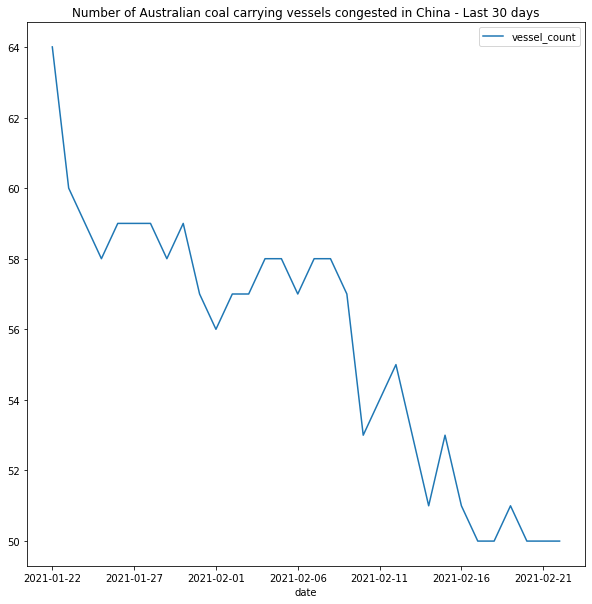

In [6]:
#Let's plot the timeseries
df.plot(x='date', y='vessel_count', figsize=(10,10), title='Number of Australian coal carrying vessels congested in China - Last 30 days');